In [2]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load the Dataset
# Adjust the file path as necessary
data = pd.read_csv('data.xlsx - Sheet1.csv')  # Replace with the correct file path if needed


In [6]:
# Step 3: Data Cleaning
# Convert date columns to datetime format with explicit format
data['DOJ'] = pd.to_datetime(data['DOJ'], format='%m/%d/%Y', errors='coerce')
data['DOL'] = pd.to_datetime(data['DOL'], format='%m/%d/%Y', errors='coerce')
data['DOB'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y', errors='coerce')
# Check for missing values
print(data.isnull().sum())


Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                      3998
DOL                      3998
Designation                 0
JobCity                     0
Gender                      0
DOB                      3998
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg 

In [7]:
# Dropping rows with missing salary values
data = data.dropna(subset=['Salary'])

# Fill missing values for categorical columns if needed
data['Specialization'] = data['Specialization'].fillna('Unknown')

# Drop columns that are not useful for analysis
data.drop(columns=['Unnamed: 0'], inplace=True)

# Display the cleaned dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    0 non-null      datetime64[ns]
 3   DOL                    0 non-null      datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    0 non-null      datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

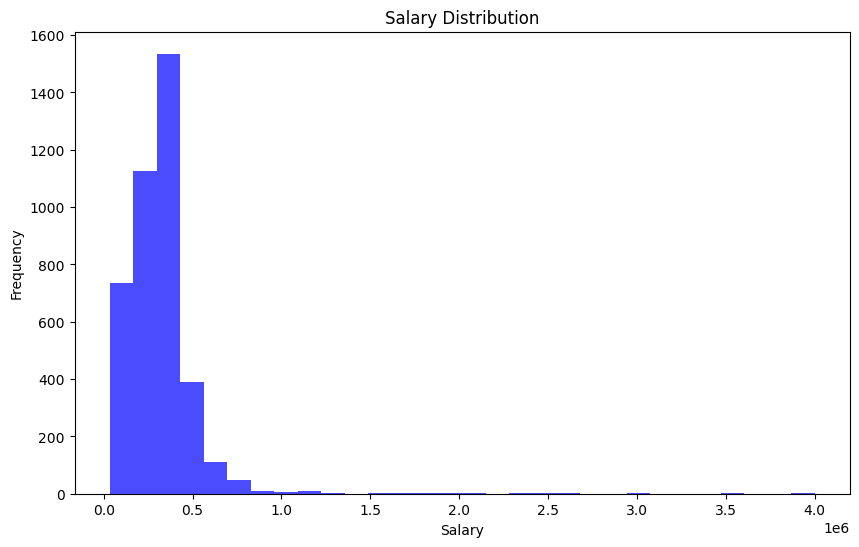

In [8]:
# Step 4: Univariate Analysis
# Univariate analysis for Salary
plt.figure(figsize=(10, 6))
plt.hist(data['Salary'], bins=30, alpha=0.7, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()



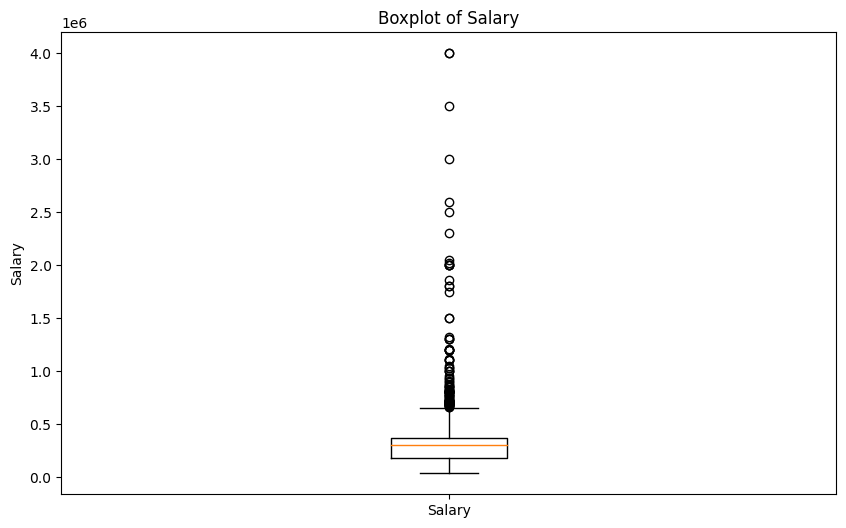

In [9]:
# Boxplot for detecting salary outliers using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(data['Salary'])
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.xticks([1], ['Salary'])  # Customizing x-ticks
plt.show()


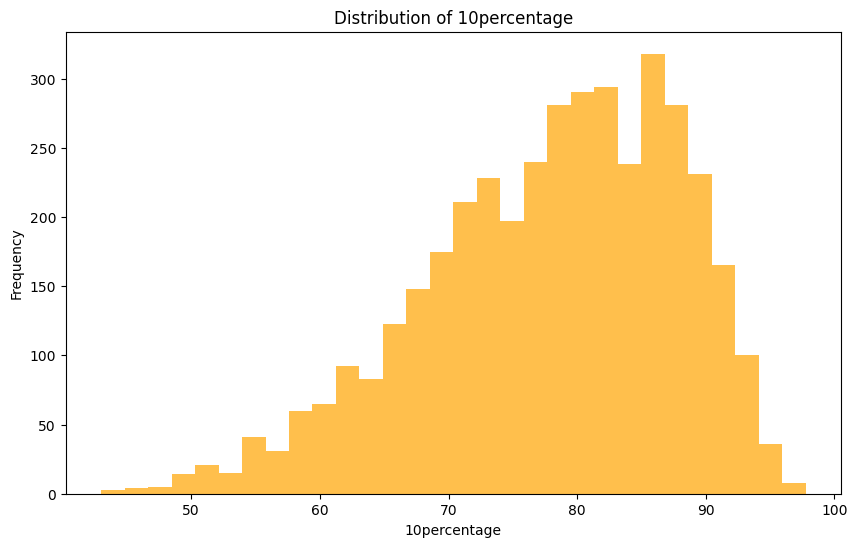

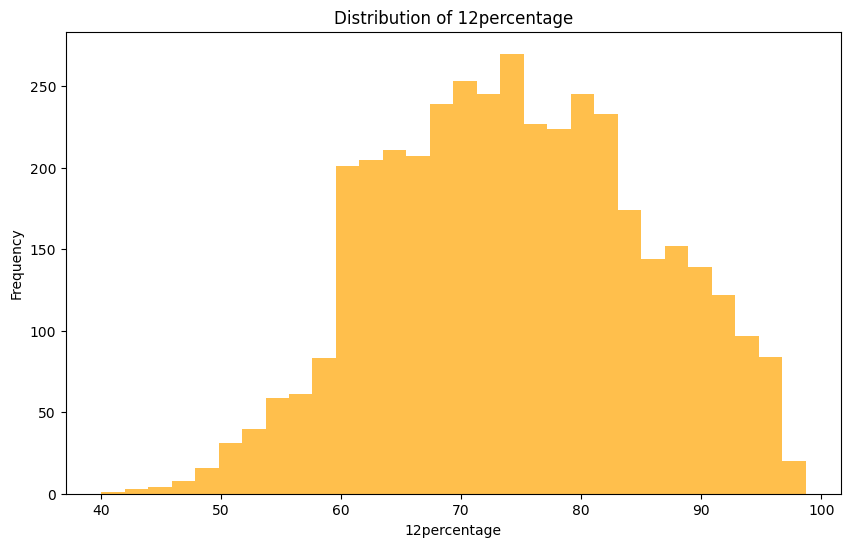

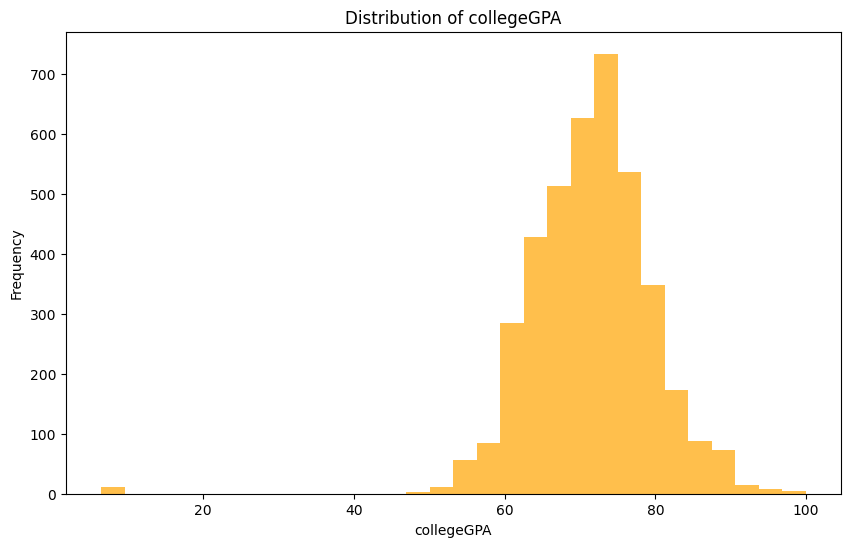

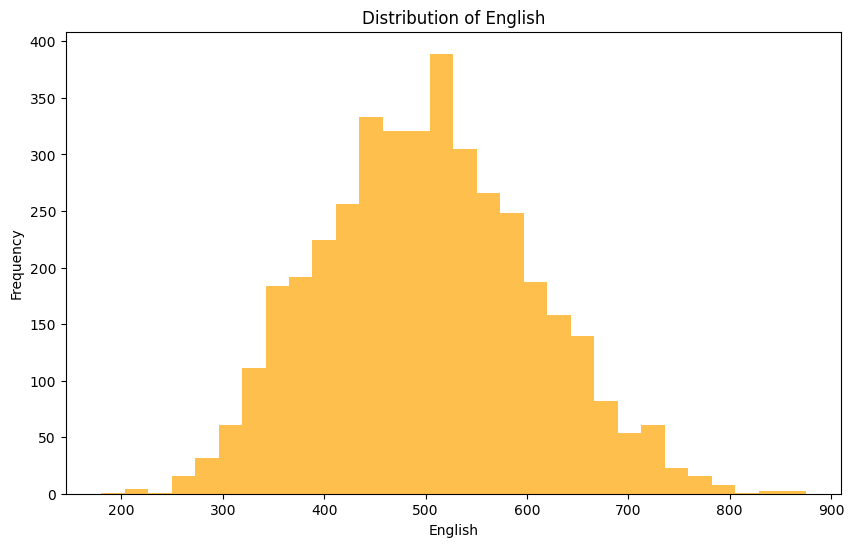

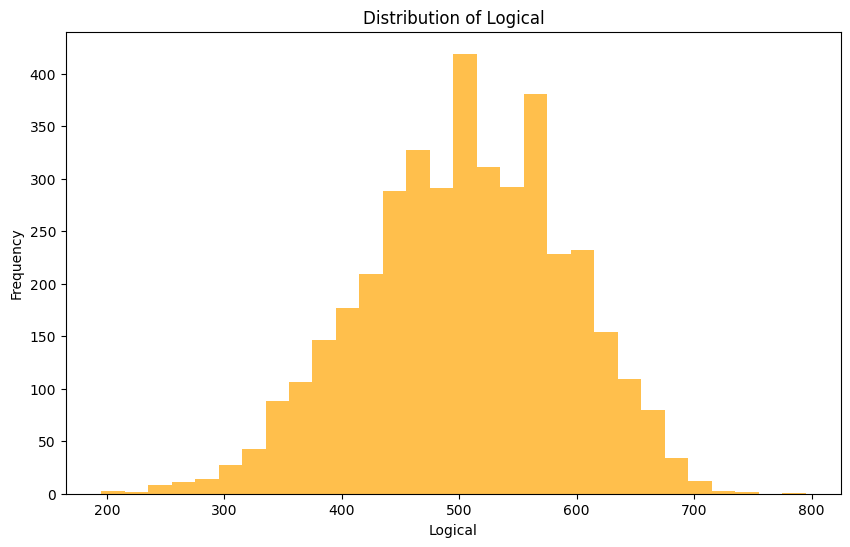

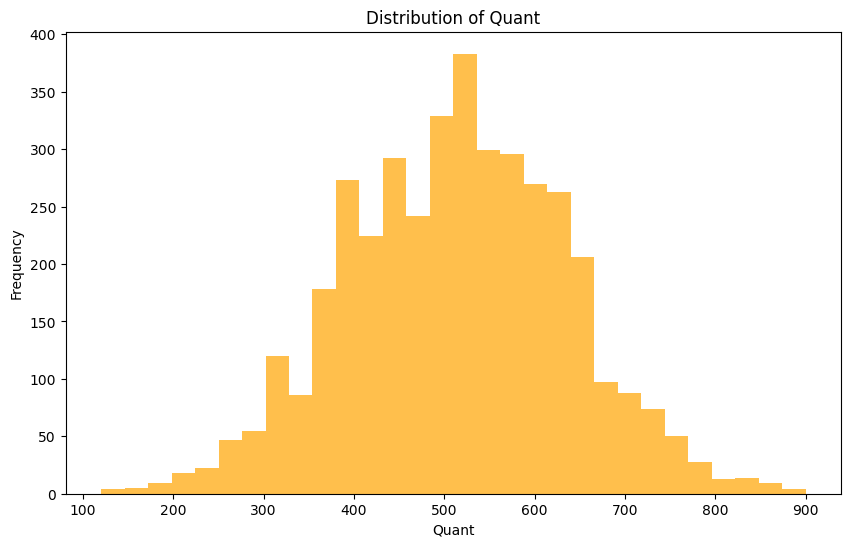

In [10]:
# Histograms for other numerical variables
numerical_columns = ['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[col], bins=30, alpha=0.7, color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

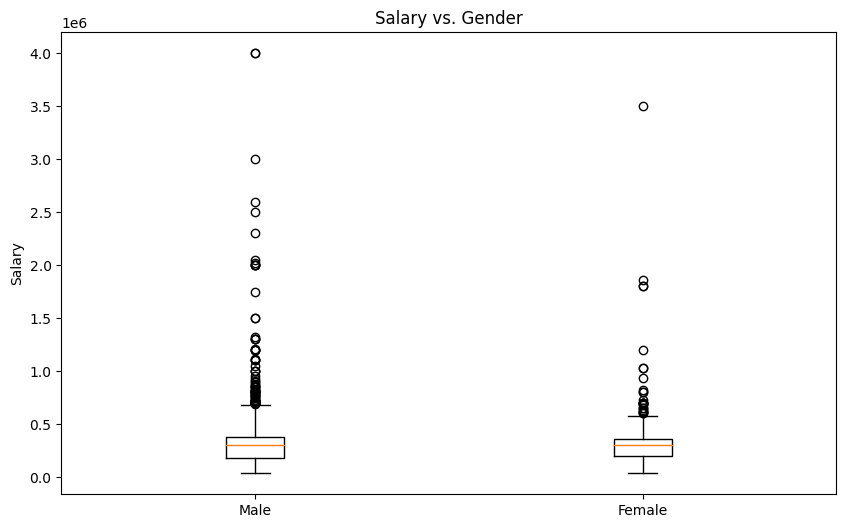

In [11]:
# Step 5: Bivariate Analysis
# Boxplot of Salary vs. Gender using matplotlib
plt.figure(figsize=(10, 6))
male_salaries = data[data['Gender'] == 'm']['Salary']
female_salaries = data[data['Gender'] == 'f']['Salary']
plt.boxplot([male_salaries, female_salaries], labels=['Male', 'Female'])
plt.title('Salary vs. Gender')
plt.ylabel('Salary')
plt.show()

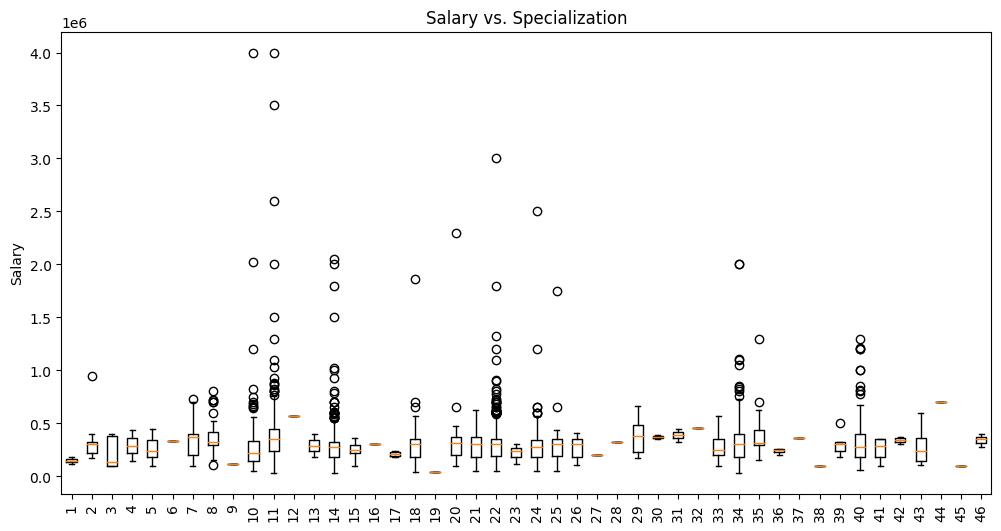

In [12]:
# Boxplot of Salary vs. Specialization using matplotlib
plt.figure(figsize=(12, 6))
specialization_groups = data.groupby('Specialization')['Salary'].apply(list)
plt.boxplot(specialization_groups)
plt.title('Salary vs. Specialization')
plt.ylabel('Salary')
plt.xticks(rotation=90)  # Rotate x-ticks for better readability
plt.show()

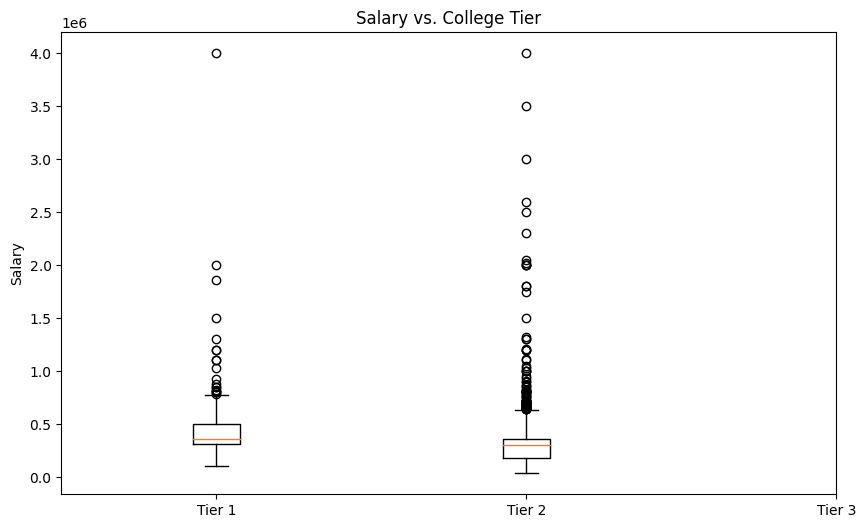

In [13]:
# Boxplot of Salary vs. College Tier using matplotlib
plt.figure(figsize=(10, 6))
college_tier_groups = data.groupby('CollegeTier')['Salary'].apply(list)
plt.boxplot(college_tier_groups)
plt.title('Salary vs. College Tier')
plt.ylabel('Salary')
plt.xticks([1, 2, 3], ['Tier 1', 'Tier 2', 'Tier 3'])  # Customize based on your CollegeTier values
plt.show()


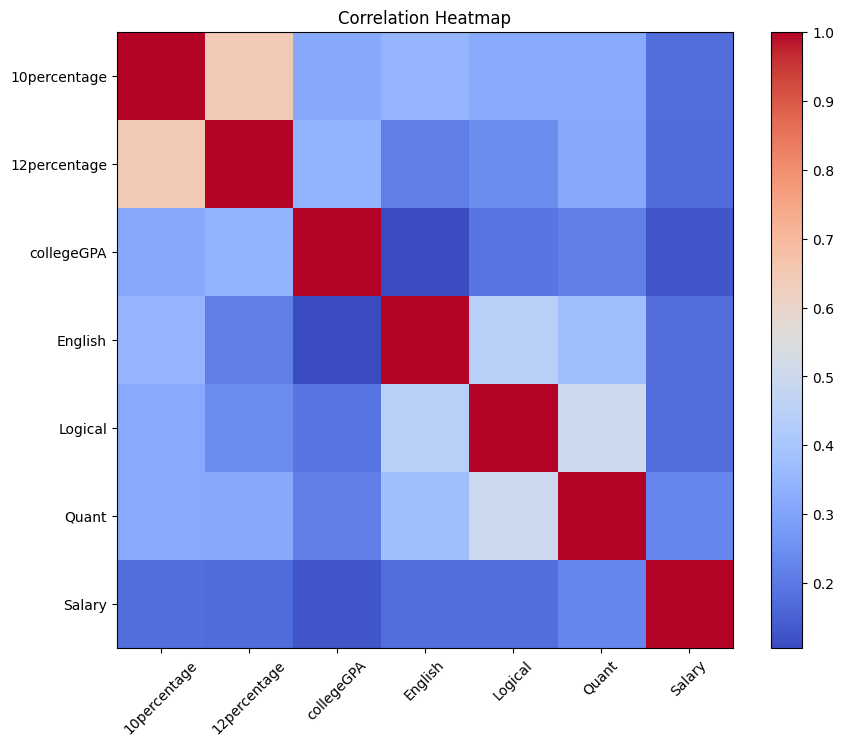

In [14]:
# Correlation heatmap for numerical variables
correlation_matrix = data[numerical_columns + ['Salary']].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Step 6: Research Questions
# Test the claim from the Times of India article about salary range
salary_claim = data[(data['Salary'] >= 250000) & (data['Salary'] <= 300000)]
specializations_in_range = salary_claim['Specialization'].value_counts()
print(specializations_in_range)


Specialization
electronics and communication engineering      117
computer science & engineering                 115
information technology                          73
computer engineering                            66
computer application                            26
mechanical engineering                          20
electronics and electrical engineering          20
electronics & telecommunications                16
electrical engineering                           9
civil engineering                                7
electronics and instrumentation engineering      6
instrumentation and control engineering          5
electronics & instrumentation eng                4
electronics engineering                          3
computer science and technology                  2
telecommunication engineering                    2
instrumentation engineering                      2
applied electronics and instrumentation          2
other                                            2
biotechnology   

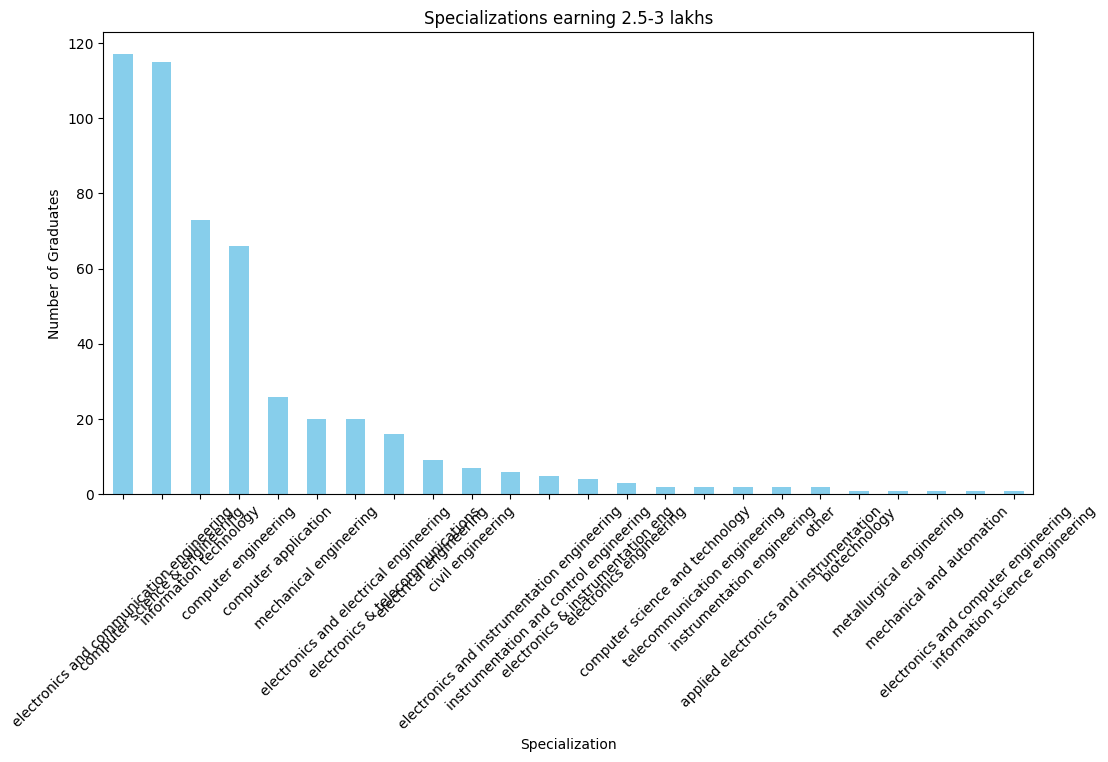

In [16]:
# Barplot for Salary in the claimed range for each specialization using matplotlib
plt.figure(figsize=(12, 6))
specializations_in_range.plot(kind='bar', color='skyblue')
plt.title('Specializations earning 2.5-3 lakhs')
plt.xlabel('Specialization')
plt.ylabel('Number of Graduates')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Chi-square test for Gender and Specialization
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 104.46891913608455, p-value: 1.2453868176976918e-06
